**Problem 2 QR Factorization**

**2.1** Orthogonality

In [5]:
import numpy as np
R = np.array([[1, 0, -2], [0, 1, 2.5], [0, 0, 0]], dtype=np.float64)
#########################################################
# Write down bases B_1 and B_2 after you've derived them
######################## YOUR CODE STARTS HERE ########################
# Find basis B_1 for the row space of R (columns of R transpose)
B_1 = np.linalg.matrix_rank(R.T)
B_1 = R.T[:B_1]

# Find basis B_2 for the null space of R
_, _, V = np.linalg.svd(R)
B_2 = V[-2:]

print('B_1:', B_1)
print('B_2:', B_2)
#######################################################################
def orth_check(B_1, B_2):
  # Compute the Frobenius norm of B_1^T * B_2
  norm_B1_B2 = np.linalg.norm(np.dot(B_1.T, B_2))

  # Compute the Frobenius norms of B_1 and B_2
  norm_B1 = np.linalg.norm(B_1)
  norm_B2 = np.linalg.norm(B_2)

  # Compute the ratio defined in equation (8)
  res = norm_B1_B2 / (norm_B1 * norm_B2)

  return res

print('Numerically check the B_1 is orthogonal to B_2')
print(orth_check(B_1, B_2))

B_1: [[1. 0. 0.]
 [0. 1. 0.]]
B_2: [[ 7.80868809e-01  6.24695048e-01  1.11022302e-16]
 [-5.96284794e-01  7.45355992e-01 -2.98142397e-01]]
Numerically check the B_1 is orthogonal to B_2
0.7071067811865475


**2.2** Projection

Check projection error orthogonal to w 
[[0.]]


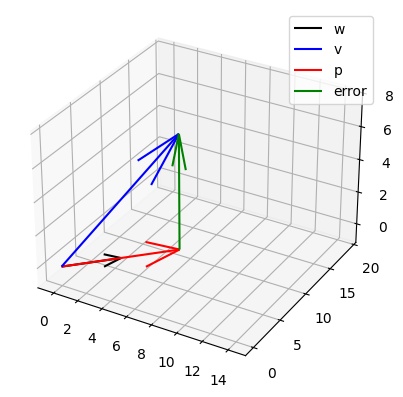

In [6]:
v = np.array([[6], [8], [7]], dtype=np.float64)
w = np.array([[3], [4], [0]], dtype=np.float64)
######################################################################
def proj_vector(w, v):
  # Projection of v onto w
  p = np.dot(np.dot(w, w.T) / np.linalg.norm(w)**2, v)
  return p

p_1 = proj_vector(w, v)

import matplotlib.pyplot as plt
def plot_3D_vec(w, v, p):
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  ax.set_xlim(-1, 15)
  ax.set_ylim(-1, 20)
  ax.set_zlim(-1, 8)

  O = [0, 0, 0]
  ax.quiver(O[0], O[1], O[2], w[0], w[1], w[2], label='w', color = 'black')
  ax.quiver(O[0], O[1], O[2], v[0], v[1], v[2], label='v', color = 'blue')
  ax.quiver(O[0], O[1], O[2], p[0], p[1], p[2], label='p', color = 'red')
  ax.quiver(p[0], p[1], p[2], v[0]-p[0], v[1]-p[1], v[2]-p[2], label='error', color= 'green')
  #ax.view_init(0, 0)
  plt.legend()

plot_3D_vec(w, v, p_1)

#### check the crucial property of the projection#####################
def check_proj_vec(w, v, p):
  # Numerically check <w, v-p> close enough to zero
  res = np.abs(np.dot(w.T, v - p)) / (np.linalg.norm(w) * np.linalg.norm(v))
  return res

print("Check projection error orthogonal to w ")
print(check_proj_vec(w, v, p_1))

In [7]:
A = np.array([[1, 0], [2, 1], [0, 1]], dtype=np.float64)

###################################################################
def proj_matrix(A, v):
  # Projection of v onto the column space of A
  p = np.dot(A, np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, v)))
  return p

p_2 = proj_matrix(A, v)

#### check the crucial property of the projection#####################
def check_proj_matrix(A, v, p):
  # Numerically check A^T(v-p) close enough to zero
  res = np.linalg.norm(np.dot(A.T, v - p)) / (np.linalg.norm(A) * np.linalg.norm(v))
  return res

print("Check projection error orthogonal to w ")
print(check_proj_matrix(A, v, p_2))

Check projection error orthogonal to w 
9.915845212041066e-17


**2.3** QR factorization for matrix with independent columns

In [8]:
A = np.array([[1, 2, 0], [0, 1, 1], [1, 0, 1]], dtype=np.float64)

def QR(A):
  m, n = A.shape
  Q = np.zeros((m, n))
  R = np.zeros((n, n))

  for i in range(n):
      v = A[:, i]
      for k in range(i):
          R[k, i] = np.dot(Q[:, k].T, v)
          v = v - R[k, i] * Q[:, k]
      R[i, i] = np.linalg.norm(v)
      Q[:, i] = v / R[i, i]

  return Q, R

Q, R = QR(A)

print("QR Factorization:")
print(Q)
print(R) # Please check your anwsers with the example of problem 2.3 shown in the pdf file

QR Factorization:
[[ 0.70710678  0.57735027 -0.40824829]
 [ 0.          0.57735027  0.81649658]
 [ 0.70710678 -0.57735027  0.40824829]]
[[1.41421356e+00 1.41421356e+00 7.07106781e-01]
 [0.00000000e+00 1.73205081e+00 5.55111512e-17]
 [0.00000000e+00 0.00000000e+00 1.22474487e+00]]


In [9]:
B = np.array([[0.488894, 0.888396, 0.325191, 0.319207],
              [1.03469, -1.14707, -0.754928, 0.312859],
              [0.726885, -1.06887, 1.3703, -0.86488],
              [-0.303441, -0.809499, -1.71152, -0.0300513],
              [0.293871, -2.94428, -0.102242, -0.164879],
              [-0.787283, 1.43838, -0.241447, 0.627707]], dtype=np.float64)

Q_1, R_1 =QR(B)


print("QR Factorization:")
print(Q_1) # Print out Q_1, R_1 matrix out and you can check Q_1^T@Q_1 = I
print(R_1) # R_1 should be a up-triangular matrix



QR Factorization:
[[ 0.30110946  0.46074898 -0.09409473  0.24498921]
 [ 0.63726483  0.0433632  -0.55860084  0.25120018]
 [ 0.44768795 -0.05049669  0.51979706 -0.41105066]
 [-0.18688909 -0.36541282 -0.61795518 -0.48979285]
 [ 0.18099494 -0.79362948  0.16394286  0.49211145]
 [-0.48488703  0.14108795 -0.01328287  0.47523194]]
[[ 1.6236421  -2.02106819  0.64872948 -0.42029906]
 [ 0.          3.24896812  0.72038807  0.4347103 ]
 [ 0.          0.          2.14747048 -0.6711592 ]
 [ 0.          0.          0.          0.74418848]]
